In [1]:
import pandas as pd
import sys
from scipy.stats import ks_2samp

#first_file = sys.argv[1]
#second_file = sys.argv[2]

def corr(first_file, second_file):
    # assuming first column is `class_name_id`
    first_df = pd.read_csv(first_file, index_col=0)
    second_df = pd.read_csv(second_file, index_col=0)
    class_names = ['scalar_coupling_constant']

    for class_name in class_names:
        # all correlations
        print('\n Class: %s' % class_name)
        print(' Pearson\'s correlation score: %0.6f' %
              first_df[class_name].corr(
                  second_df[class_name], method='pearson'))
        print(' Kendall\'s correlation score: %0.6f' %
              first_df[class_name].corr(
                  second_df[class_name], method='kendall'))
        print(' Spearman\'s correlation score: %0.6f' %
              first_df[class_name].corr(
                  second_df[class_name], method='spearman'))
        ks_stat, p_value = ks_2samp(first_df[class_name].values,
                                    second_df[class_name].values)
        print(' Kolmogorov-Smirnov test:    KS-stat = %.6f    p-value = %.3e\n'
              % (ks_stat, p_value))

#corr(first_file, second_file)

In [4]:
lgbm_best = pd.read_csv("../data/output/sub_2019-08-25_19-59-34_-1.694.csv")
kernel_nn_best = pd.read_csv("../data/output/kernel_nn_best.csv")
kernel_mpnn = pd.read_csv("../data/output/kernel_mpnn.csv")
kernel_schnet = pd.read_csv("../data/output/kernel_schnet.csv")

In [5]:
total = pd.DataFrame()
total["lgbm_best"] = lgbm_best["scalar_coupling_constant"] # all feature, val -1.68, lb -1.77
total["kernel_nn_best"] = kernel_nn_best["scalar_coupling_constant"] # dist feature nn, cv -1.70, lb -1.68
# total["nn_best"] = kernel_nn_best["scalar_coupling_constant"] # acsf and dist feature, cv 
total["kernel_mpnn"] = kernel_mpnn["scalar_coupling_constant"] # lb -1.28
total["kernel_schnet"] = kernel_schnet["scalar_coupling_constant"] # lb -1.32

In [6]:
import seaborn as sns

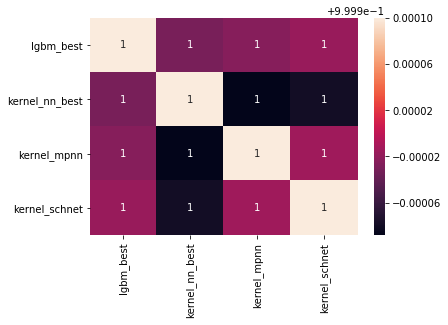

In [11]:
sns.heatmap(total.corr(), annot=True)

In [17]:
total["sub"] = 0.5 * total["lgbm_best"] + 0.3 * total["kernel_nn_best"] + 0.1 * total["kernel_mpnn"] + 0.1 * total["kernel_schnet"]

In [18]:
total.head(100)

,lgbm_best,kernel_nn_best,kernel_mpnn,kernel_schnet,sub
0,15.984929,16.752722,19.242008,44.753227,19.417805
1,193.552870,129.551773,186.417656,187.187320,173.002464
2,9.666247,5.626666,14.021063,3.590468,8.282276
3,192.994559,129.551773,186.417664,187.187320,172.723310
4,15.649306,16.752722,19.242008,44.753227,19.249993
5,89.717194,82.277916,91.277396,90.929690,87.762681
6,2.096379,1.578010,2.163452,2.346448,1.972583
7,-7.631462,-9.356209,-7.642238,-7.683194,-8.155137
8,-9.696206,-9.920478,-9.627069,-9.780015,-9.764955
9,89.719934,82.279091,91.277786,90.935210,87.764994


In [19]:
import feather
sub = feather.read_dataframe('../data/input/sample_submission.feather')
sub['scalar_coupling_constant'] = total["sub"]
sub.to_csv('../data/output/sub_blend_0.5_0.3_0.15_0.15.csv', index=False)

In [20]:
sub.head()

,id,scalar_coupling_constant
0,4658147,19.417805
1,4658148,173.002464
2,4658149,8.282276
3,4658150,172.723310
4,4658151,19.249993
